In [21]:
import numpy as np
from scipy.stats import norm, t
from scipy.optimize import minimize

In [22]:
x = np.random.normal(loc=2, scale=3, size=1000)
x_t = t.rvs(df=20, loc=2, scale=3, size=1000) 

def get_neg_log_lik(data, dist, kw):
    return lambda params: -1 * np.sum(dist.logpdf(data, **{kw[i] : params[i] for i in range(len(params))}))

def optim(log_lik, x0):
    return minimize(neg_log_lik, x0,method='Nelder-Mead', options={"maxiter":10_000*len(x0)}) #BFGS

neg_log_lik = get_neg_log_lik(x_t, t, ['df', 'loc', 'scale'])
optim(neg_log_lik, [3, 1, 1])


 final_simplex: (array([[104.52270587,   2.02532622,   3.01755005],
       [104.52272801,   2.02532621,   3.01755006],
       [104.52272669,   2.02532622,   3.01755004],
       [104.52276392,   2.02532621,   3.01755006]]), array([2532.9738803, 2532.9738803, 2532.9738803, 2532.9738803]))
           fun: 2532.9738802977454
       message: 'Optimization terminated successfully.'
          nfev: 278
           nit: 150
        status: 0
       success: True
             x: array([104.52270587,   2.02532622,   3.01755005])

In [23]:
generated_data = np.random.normal(loc=2, scale=3, size=100)
kw = ['loc', 'scale']
params = [1,3]
dict(zip(kw,params))

{'loc': 1, 'scale': 3}

# Using Actual Data

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
SPY_2DAY = pd.read_csv('E-mini S&P 500 minute data (2 days).csv')

In [26]:
def load_data():
    df = pd.read_csv(
        'E-mini S&P 500 minute data (2 days).csv', header=1)
    cols = ["Date Time", "Close"]
    data = df[cols]
    data = data.set_axis(["timestamp", "close"], axis=1)
    return data


def deltas():
    df = load_data()
    df["log"] = np.log(df["close"].astype(float))
    df["deltas"] = df["log"].diff()
    df.dropna(inplace=True)
    final_data = df[["timestamp", "close", "deltas"]]
    #final_data = final_data.set_axis(["timestamp", "close", "deltas"], axis=1)
    return final_data

In [27]:
data = deltas()
feb_09 = data[(data['timestamp'] >= '2022-02-09') & (data['timestamp'] < '2022-02-10')]

In [28]:
feb_09['deltas']

1      0.000165
2     -0.000110
3      0.000055
4     -0.000110
5     -0.000110
         ...   
941    0.000219
942    0.000109
943    0.000109
944    0.000438
945    0.000109
Name: deltas, Length: 945, dtype: float64

(array([  2.,   0.,   6.,   3.,   3.,   6.,  22.,  35.,  95., 220., 284.,
        144.,  61.,  28.,  18.,   7.,   5.,   1.,   1.,   4.]),
 array([-1.09487064e-03, -9.85506173e-04, -8.76141704e-04, -7.66777236e-04,
        -6.57412768e-04, -5.48048300e-04, -4.38683832e-04, -3.29319363e-04,
        -2.19954895e-04, -1.10590427e-04, -1.22595874e-06,  1.08138509e-04,
         2.17502978e-04,  3.26867446e-04,  4.36231914e-04,  5.45596382e-04,
         6.54960851e-04,  7.64325319e-04,  8.73689787e-04,  9.83054255e-04,
         1.09241872e-03]),
 <BarContainer object of 20 artists>)

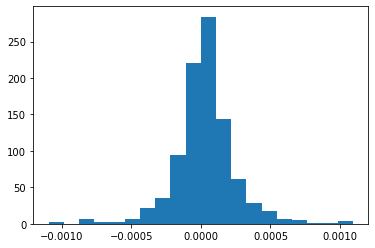

In [29]:
plt.hist(feb_09['deltas'], bins=20)

In [30]:
neg_log_lik = get_neg_log_lik(feb_09['deltas'], norm, ['loc', 'scale'])
optim(neg_log_lik, [0, 0.001])

 final_simplex: (array([[3.73385354e-06, 2.19725284e-04],
       [3.63646961e-06, 2.19965473e-04],
       [4.05164960e-06, 2.19920762e-04]]), array([-6618.34372915, -6618.34368707, -6618.34366668]))
           fun: -6618.343729151348
       message: 'Optimization terminated successfully.'
          nfev: 68
           nit: 35
        status: 0
       success: True
             x: array([3.73385354e-06, 2.19725284e-04])